In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal


In [5]:
#Load Cleaned Data
df_benin = pd.read_csv('../data/benin_clean.csv')
df_sierra = pd.read_csv('../data/sierraleone_clean.csv')
df_togo = pd.read_csv('../data/togo_clean.csv')

df_benin['Country'] = 'Benin'
df_sierra['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'

df_all = pd.concat([df_benin, df_sierra, df_togo], ignore_index=True)


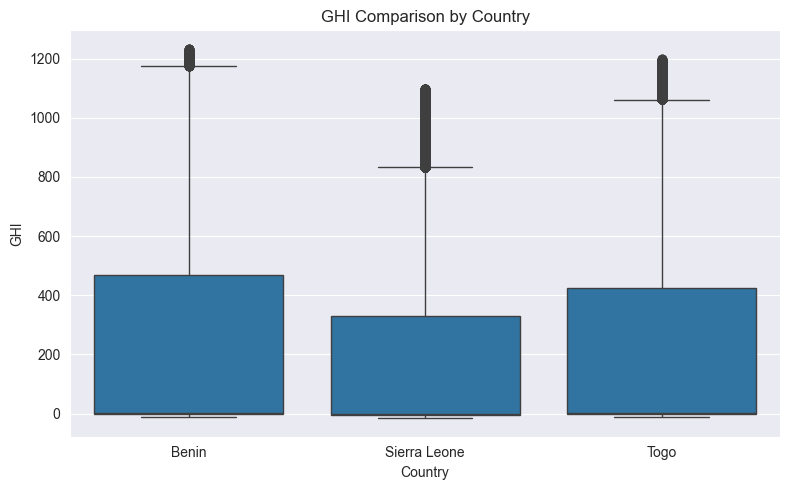

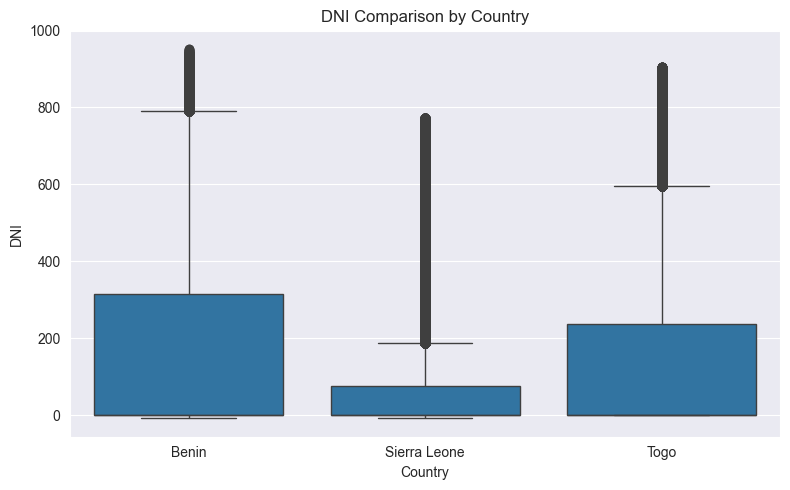

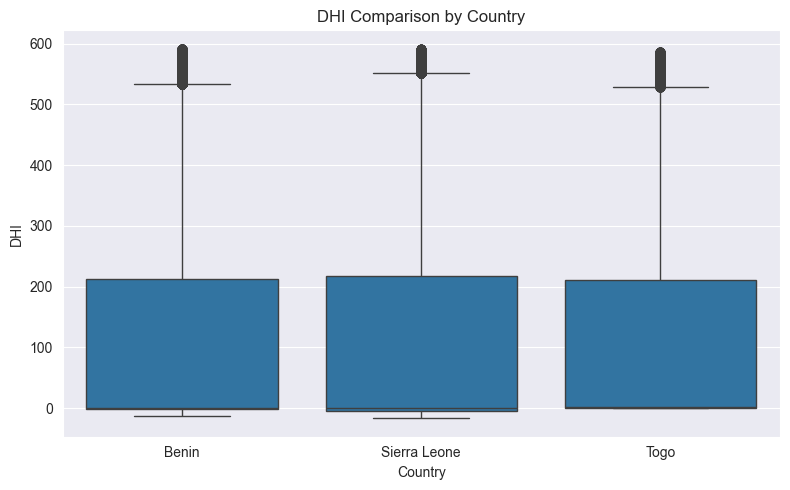

In [6]:
#Boxplots of GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Comparison by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()


In [10]:
#Summary Table (Mean, Median, SD)
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744

In [8]:
# ANOVA Using Kruskal-Wallis (robust to non-normality)
from scipy.stats import kruskal

stat, p_value = kruskal(
    df_benin['GHI'],
    df_sierra['GHI'],
    df_togo['GHI']
)

print("Kruskal-Wallis Test on GHI:")
print(f"Statistic: {stat:.3f}, p-value: {p_value:.5f}")


Kruskal-Wallis Test on GHI:
Statistic: 6548.534, p-value: 0.00000


### Key Observations

- **Benin** has the **highest mean and median GHI**, but also displays the **greatest variability**, suggesting a wider spread in solar irradiance.
- **Sierra Leone** has the **lowest mean and median GHI**, indicating comparatively lower solar potential across all metrics.
- The **Kruskal-Wallis test confirms statistically significant differences** in GHI among the three countries (**p < 0.05**), supporting that solar potential is not evenly distributed.


C:\Users\Haile\AppData\Local\Temp\ipykernel_17532\3528453322.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")


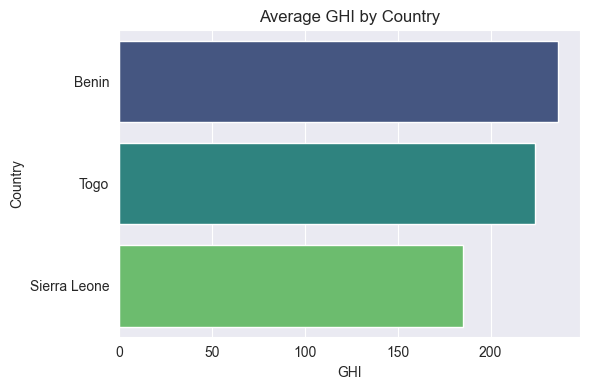

In [9]:
# visual summary: Bar Chart of Average GHI
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")
plt.title('Average GHI by Country')
plt.xlabel('GHI')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
